In [1]:
import pandas as pd

# Series

## Creating a Series

In [2]:
# you can build a series using a list
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [3]:
# if you use a dictionary, the keys will be considered as the index
s = pd.Series({"a": 1, "b": 2, "c": 3})
s

a    1
b    2
c    3
dtype: int64

In [4]:
# alternatively, you can use a list and define an index
s = pd.Series([1, 2, 3], index=["a", "b", "c"])
s

a    1
b    2
c    3
dtype: int64

## Facts about Series

### You can retrieve values using numeric indices

In [5]:
s.iloc[0]

np.int64(1)

In [6]:
s.iloc[0:1]

a    1
dtype: int64

In [7]:
s.iloc[0:2]

a    1
b    2
dtype: int64

In [8]:
s.iloc[0:2:2]

a    1
dtype: int64

In [9]:
s[::-1]

c    3
b    2
a    1
dtype: int64

### You can use the "in" operator

In [10]:
# check if a value is in the index
"a" in s

True

In [11]:
# check if a value is in the series
s.isin([1])

a     True
b    False
c    False
dtype: bool

In [12]:
1 in s.values

True

## loc vs iloc

- `loc` uses the index
    - slicing is inclusive
    - in a df: `df.loc[row_label, column_label]`
- `iloc` uses the position - iloc stands for "integer-location based indexing"
    - slicing is exclusive
    - in a df: `df.iloc[row_position, column_position]`

In [13]:
s.loc["a"]

np.int64(1)

In [14]:
s.iloc[0]

np.int64(1)

In [15]:
# find the last element of the series
s.iloc[-1]

np.int64(3)

In [16]:
# you can also use slicing - in this case the stop is included!
s.loc["a": "b"]

a    1
b    2
dtype: int64

In [17]:
# if an index doesn't exist, it will throw an error
try:
    s.loc["e"]
except KeyError:
    print("Index doesn't exist")

Index doesn't exist


## Retrieving the values and the index

In [18]:
s.values

array([1, 2, 3])

In [19]:
# index can be made of strings or int
s.index

Index(['a', 'b', 'c'], dtype='object')

In [20]:
# we can also replace the index of a series
s.index = [1, 2, 3]
s

1    1
2    2
3    3
dtype: int64

In [21]:
# index can be non-unique
s.index = ["a", "a", "b"]
s

a    1
a    2
b    3
dtype: int64

In [22]:
s.loc["a"]

a    1
a    2
dtype: int64

In [23]:
# if the index is non-unique, slicing doesn't work
s.loc["a":"b"]

a    1
a    2
b    3
dtype: int64

In [24]:
s = pd.Series(data=[1, 2, 3, 4], index=["a", "a", "b", "a"])

In [25]:
try:
    s.loc["a": "b"]
except KeyError as e:
    print(e)

"Cannot get left slice bound for non-unique label: 'a'"


## Fancy Indexing

We can repeat the indexes and get the value multiple times

In [26]:
s = pd.Series(data=[1, 2, 3, 4], index=["a", "b", "c", "d"])
s

a    1
b    2
c    3
d    4
dtype: int64

In [27]:
s.loc[["a", "a"]]

a    1
a    1
dtype: int64

In [28]:
s.iloc[[0, 1, 0, 1]]

a    1
b    2
a    1
b    2
dtype: int64

## Boolean Indexing

In [29]:
s

a    1
b    2
c    3
d    4
dtype: int64

In [30]:
s == 2

a    False
b     True
c    False
d    False
dtype: bool

In [31]:
s[s == 2]

b    2
dtype: int64

In [32]:
s > 2

a    False
b    False
c     True
d     True
dtype: bool

In [33]:
s[s > 2]

c    3
d    4
dtype: int64

In [34]:
s[(s > 1) & (s < 4)]

b    2
c    3
dtype: int64

## Basic methods

In [35]:
print("s.sum() =", s.sum())
print("s.min() =", s.min())
print("s.max() =", s.max())
print("s.mean() =", s.mean())
print("s.std() =", s.std())

s.sum() = 10
s.min() = 1
s.max() = 4
s.mean() = 2.5
s.std() = 1.2909944487358056


You can also apply basic operations such as addition, subtraction, multiplication, and division.
- If the operation is between two series, it is vectorised
- If the operation is between one scalar and a series, the scalar is broadcasted (i.e. applied to each element of the series)

In [36]:
s1 = pd.Series(data=[10, 20])
s2 = pd.Series(data=[1, 2, 3])

In [37]:
s1

0    10
1    20
dtype: int64

In [38]:
s2

0    1
1    2
2    3
dtype: int64

In [39]:
s1 + s2

0    11.0
1    22.0
2     NaN
dtype: float64

In [40]:
s1 - s2

0     9.0
1    18.0
2     NaN
dtype: float64

In [41]:
s1 * s2

0    10.0
1    40.0
2     NaN
dtype: float64

In [42]:
s1 / s2

0    10.0
1    10.0
2     NaN
dtype: float64

In [43]:
s1 + 1

0    11
1    21
dtype: int64

In [44]:
s.iloc[2]

np.int64(3)

## Types

NB: Pandas changes the dtype of the entire series to accomodate for a value of a different type - this will change in the future!

In [45]:
s

a    1
b    2
c    3
d    4
dtype: int64

In [46]:
s.iloc[3] = 5.5

/var/folders/ws/xh9mmcpn2v721tc86jthpmcw0000gn/T/ipykernel_30045/562917466.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[3] = 5.5


In [47]:
s

a    1.0
b    2.0
c    3.0
d    5.5
dtype: float64

## Null Values

None and np.nan behave in the same way

In [48]:
s.iloc[3] = None

In [49]:
s

a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64

In [50]:
import numpy as np

In [51]:
s.iloc[2] = np.nan

In [52]:
s

a    1.0
b    2.0
c    NaN
d    NaN
dtype: float64

In Pandas, you can do computations even if you have null values. They will be filtered out automatically.

In [53]:
s.sum()

np.float64(3.0)

In [54]:
s.mean()

np.float64(1.5)

In [55]:
# you can drop null values
s = s.dropna()
s

a    1.0
b    2.0
dtype: float64

In [56]:
# you can fill them
s.loc["c"] = None
s

a    1.0
b    2.0
c    NaN
dtype: float64

In [57]:
s = s.fillna(s.mean())
s

a    1.0
b    2.0
c    1.5
dtype: float64

## Advanced Series Functionalities

### Size

In [58]:
s.loc["d"] = None

In [59]:
# size counts also the NaN values
s.size

4

### Count

In [60]:
# count excludes the NaN
s.count()

np.int64(3)

### Median

In [61]:
s.loc["e"] = 4
s

a    1.0
b    2.0
c    1.5
d    NaN
e    4.0
dtype: float64

In [62]:
# the median sorts all values from the smallest to the largest and finds the value in the middle
s.sort_values()

a    1.0
c    1.5
b    2.0
e    4.0
d    NaN
dtype: float64

In [63]:
# note how the null value is ignored
s.median()

np.float64(1.75)

In [64]:
s.loc["d"] = 5

In [65]:
s.sort_values()

a    1.0
c    1.5
b    2.0
e    4.0
d    5.0
dtype: float64

In [66]:
s.median()

np.float64(2.0)

### Quantiles

In [67]:
s.quantile(0.5) # this is equivalent to the median

np.float64(2.0)

In [68]:
s.quantile([0.25, 0.5, 0.75])

0.25    1.5
0.50    2.0
0.75    4.0
dtype: float64

#### Quantiles vs Quartiles

Quantiles are division of the dataset in k equal parts
Common quantiles are:
- median: divides the data into 2 equal parts (2 quantiles)
- percentile: divides the data into 100 equal parts
- quartiles: divides the data into 4 equal parts

Quartiles are a special case of quantiles where the data is divided into 4 equal part.
There are 3 quartiles:
- first quartile (Q1): separates the lowest 25% of the data. Also called the 25th percentile.
- second quartile (Q2): separates the data in two parts. Also called 50th percentile or median.
- third quartile (Q3): separates the upper 25% of the data. Also called 75th percentile.

In [69]:
s.quantile([0.1, 0.95])  # 10th and 95th percentiles

0.10    1.2
0.95    4.8
dtype: float64

### Descriptive Stats

In [70]:
s.describe()

count    5.000000
mean     2.700000
std      1.717556
min      1.000000
25%      1.500000
50%      2.000000
75%      4.000000
max      5.000000
dtype: float64

### How many times a value is in series?

In [71]:
s.value_counts()

1.0    1
2.0    1
1.5    1
5.0    1
4.0    1
Name: count, dtype: int64

`value_counts()` returns a series. The index are the unique values and the values are the counts. It is sorted in descending order.

In [72]:
# you can also get the % values
s.value_counts(normalize=True)
               

1.0    0.2
2.0    0.2
1.5    0.2
5.0    0.2
4.0    0.2
Name: proportion, dtype: float64

### Duplicates

In [73]:
s.duplicated()

a    False
b    False
c    False
d    False
e    False
dtype: bool

### Unique Elements

In [74]:
s.unique()
# this returns a numpy array, not a pandas series

array([1. , 2. , 1.5, 5. , 4. ])

### Replace

In [75]:
s

a    1.0
b    2.0
c    1.5
d    5.0
e    4.0
dtype: float64

In [76]:
s.replace(1, 10)

a    10.0
b     2.0
c     1.5
d     5.0
e     4.0
dtype: float64

In [77]:
s.replace({2: 20, 5: 50})

a     1.0
b    20.0
c     1.5
d    50.0
e     4.0
dtype: float64

### Sort

In [78]:
s.sort_values()

a    1.0
c    1.5
b    2.0
e    4.0
d    5.0
dtype: float64

In [79]:
s.sort_values(ascending=False)

d    5.0
e    4.0
b    2.0
c    1.5
a    1.0
dtype: float64

In [80]:
# describe the 2 smallest values in the series
s.sort_values()[:2]

a    1.0
c    1.5
dtype: float64

In [81]:
s.sort_values()[:2].describe()

count    2.000000
mean     1.250000
std      0.353553
min      1.000000
25%      1.125000
50%      1.250000
75%      1.375000
max      1.500000
dtype: float64

In [82]:
# NaN are always sorted last (as default). Otherwise you need to add 'na_position'

In [83]:
s["c"] = None

In [84]:
s

a    1.0
b    2.0
c    NaN
d    5.0
e    4.0
dtype: float64

In [85]:
s.sort_values()

a    1.0
b    2.0
e    4.0
d    5.0
c    NaN
dtype: float64

In [86]:
s.sort_values(ascending=False)

d    5.0
e    4.0
b    2.0
a    1.0
c    NaN
dtype: float64

In [87]:
s.sort_values(na_position='first')

c    NaN
a    1.0
b    2.0
e    4.0
d    5.0
dtype: float64

If the series is made of string, capital letters come before small caps; then is alphabetical.

## Apply

The `apply()` method is useful to apply a function to each element of the series

In [88]:
s

a    1.0
b    2.0
c    NaN
d    5.0
e    4.0
dtype: float64

In [89]:
s.apply(lambda x: x**2)

a     1.0
b     4.0
c     NaN
d    25.0
e    16.0
dtype: float64

You can also define a custom function

In [90]:
def categorise_number(x):
    if x < 3:
        return "small"
    elif x < 5:
        return "medium"
    else:
        return "big"

In [91]:
s.apply(categorise_number)

a     small
b     small
c       big
d       big
e    medium
dtype: object

In [92]:
# get the length of each element of the series
s = pd.Series(data="This is a test 4".split())
s

0    This
1      is
2       a
3    test
4       4
dtype: object

In [93]:
s.apply(len)

0    4
1    2
2    1
3    4
4    1
dtype: int64

## Str method

The `.str` accessor allows you to apply string operations directly on each element of the Series

In [94]:
s.str.len()

0    4
1    2
2    1
3    4
4    1
dtype: int64

In [95]:
# find numbers in a series
s.str.isdigit()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [96]:
# find elements that start/end with a letter
s.str.startswith("t")

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [97]:
s.str.startswith(('t', 'T')) # one or the other

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [98]:
s.str.endswith("s")

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [99]:
# get the first letter of each element
s.str[0]

0    T
1    i
2    a
3    t
4    4
dtype: object

In [100]:
s.str.get(0)

0    T
1    i
2    a
3    t
4    4
dtype: object

In [101]:
s.str[:3]

0    Thi
1     is
2      a
3    tes
4      4
dtype: object

In [102]:
s.str[3]

0      s
1    NaN
2    NaN
3      t
4    NaN
dtype: object

In [103]:
s.str[3].dropna()

0    s
3    t
dtype: object

In [104]:
# find the elements where the first letter is equal to the last
s.str[0]

0    T
1    i
2    a
3    t
4    4
dtype: object

In [105]:
s.str[-1]

0    s
1    s
2    a
3    t
4    4
dtype: object

In [106]:
s[s.str[0] == s.str[-1]]

2       a
3    test
4       4
dtype: object

In [107]:
s[s.str.contains("a")]

2    a
dtype: object

In [108]:
# contains expects a regex
s[s.str.contains("a|t")]

2       a
3    test
dtype: object

In [109]:
# find returns the index of the first apparance of the element
# -1 means that the string was not found
s.str.find('4')

0   -1
1   -1
2   -1
3   -1
4    0
dtype: int64

In [110]:
s.str.find("t")

0   -1
1   -1
2   -1
3    0
4   -1
dtype: int64

In [111]:
s.str.find("i")

0    2
1    0
2   -1
3   -1
4   -1
dtype: int64

In [112]:
s.str.capitalize()

0    This
1      Is
2       A
3    Test
4       4
dtype: object

In [113]:
s.str.lower()

0    this
1      is
2       a
3    test
4       4
dtype: object

In [114]:
s.str.upper()

0    THIS
1      IS
2       A
3    TEST
4       4
dtype: object

In [115]:
s.str.replace("i", "*")

0    Th*s
1      *s
2       a
3    test
4       4
dtype: object

In [116]:
s.str.strip() # removes whitespaces from the outside

0    This
1      is
2       a
3    test
4       4
dtype: object

# Plots

In [117]:
import matplotlib.pyplot as plt

In [118]:
s = pd.Series(data=[10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

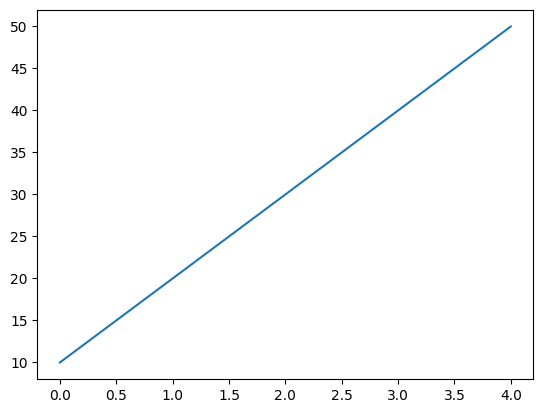

In [119]:
plt.plot(s)

In [120]:
# let's change the index
s.index = list('abcde')

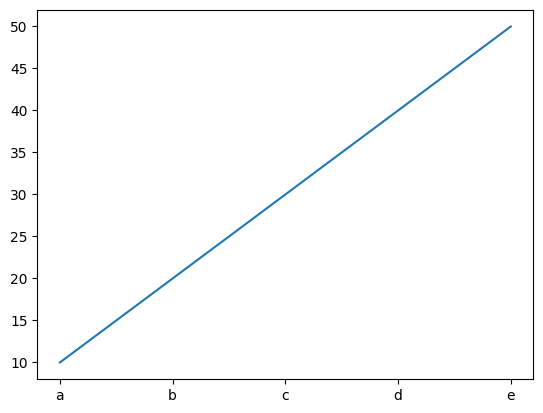

In [121]:
plt.plot(s)

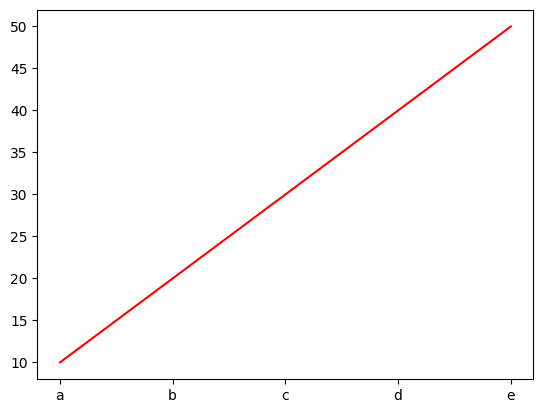

In [122]:
plt.plot(s, color='red')

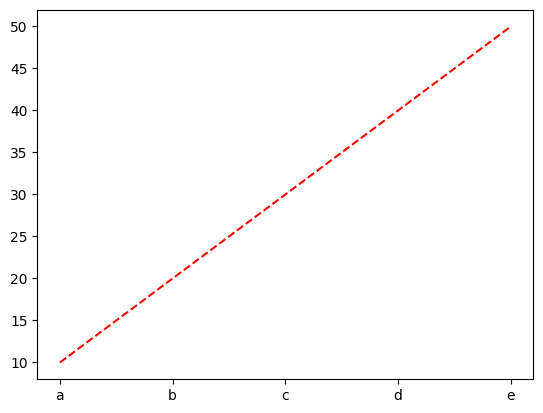

In [123]:
plt.plot(s, color='red', linestyle='dashed')

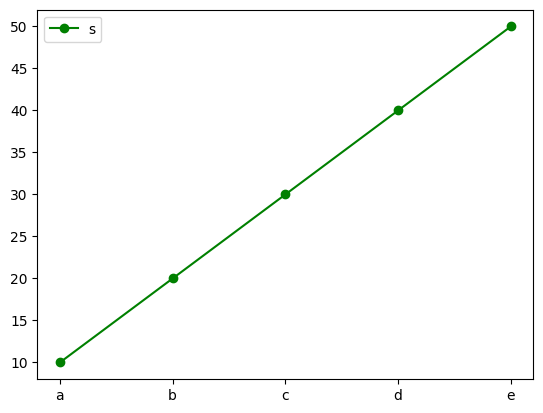

In [124]:
plt.plot(s, '-o', color='green', label='s')
plt.legend()

### Types of Plots

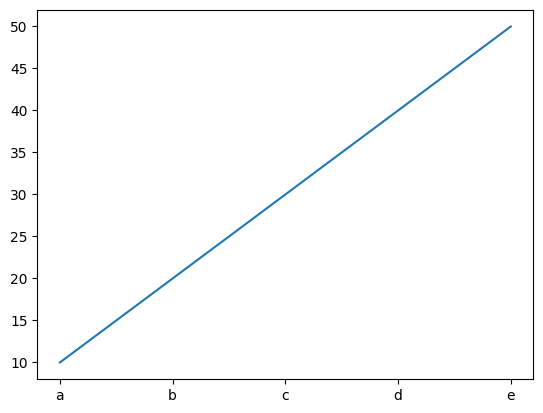

In [125]:
# line plot
plt.plot(s)

<BarContainer object of 5 artists>

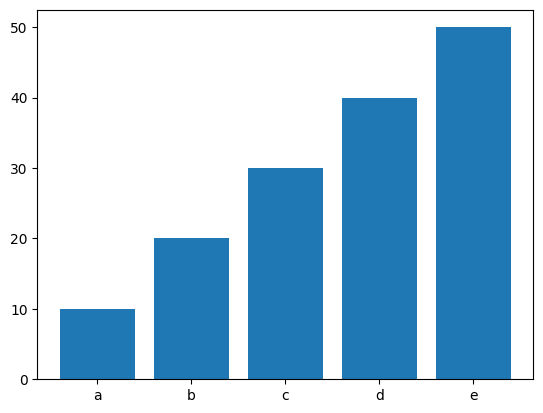

In [126]:
# bar plot
plt.bar(s.index, s.values)

<BarContainer object of 5 artists>

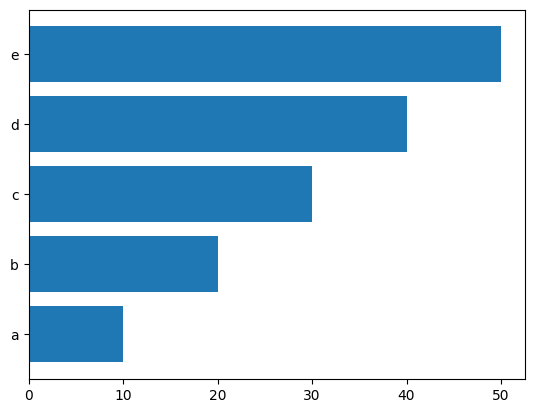

In [127]:
# horizontal bar plot
plt.barh(s.index, s.values)

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

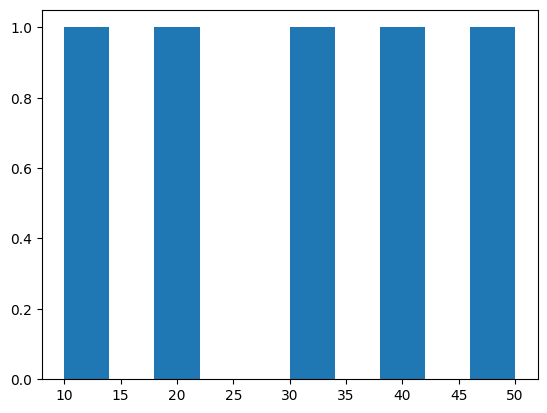

In [128]:
# histogram
plt.hist(s) # the values are divided in bins (x-axis) and on the y-axis you see the frequency

([<matplotlib.patches.Wedge at 0x119683710>,
 [Text(0.8899186825075615, 0.6465637930815537, '10'),
  Text(-0.339918873399729, 1.0461621095732052, '20'),
  Text(-1.0999999999999959, -9.616505800409723e-08, '30'),
  Text(-0.3399183163461554, -1.046162290570825, '40'),
  Text(0.8899186414035474, -0.6465638496563697, '50')])

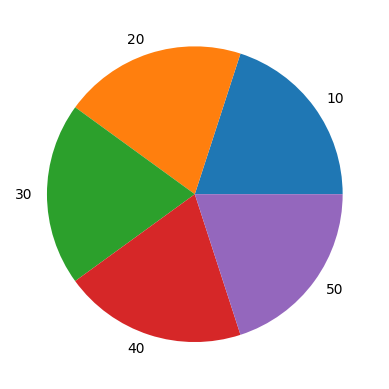

In [129]:
# pie
plt.pie(s.value_counts(), labels=s.value_counts().index)

In [130]:
s.value_counts()

10    1
20    1
30    1
40    1
50    1
Name: count, dtype: int64

# DataFrames

## Creating a DataFrame

In [131]:
# list of lists
df = pd.DataFrame([[1, 2], [3, 4]], index=["a", "b"], columns=["one", "two"])

In [132]:
# or dict where keys are column names and values are lists
df = pd.DataFrame({"one": [1, 3], "two": [2, 4]})

In [133]:
df

,one,two
0,1,2
1,3,4


Each list creates a row in the DataFrame. Once you have a df, each column is a series.

The index and the columns can be changed also after the df is created

In [134]:
# NB: you can specify columns to exclude data
pd.DataFrame({"one": [1, 3], "two": [2, 4]}, columns = ["two"])

,two
0,2
1,4


In [135]:
df.index = ["one", "two"]
df

,one,two
one,1,2
two,3,4


In [136]:
df.columns = ["a", "b"]
df

,a,b
one,1,2
two,3,4


## Retrieve one row

In [137]:
df.loc["one"]

a    1
b    2
Name: one, dtype: int64

In [138]:
df.iloc[0]

a    1
b    2
Name: one, dtype: int64

Notice how the retrieved row becomes a series and the columns become the index of the new series.

## Retrieve multiple rows

In [139]:
df

,a,b
one,1,2
two,3,4


In [140]:
df.loc["one"]

a    1
b    2
Name: one, dtype: int64

In [141]:
df.loc[["one", "two"]]

,a,b
one,1,2
two,3,4


In [142]:
# note how the stop is included here
df.loc["one":"two"]

,a,b
one,1,2
two,3,4


In [143]:
# if we use iloc, the stop is instead excluded
df.iloc[0:1]

,a,b
one,1,2


## Retrive one column

In [144]:
df["a"]

one    1
two    3
Name: a, dtype: int64

## Retrieve multiple columns

In [145]:
df[["a", "b"]]

,a,b
one,1,2
two,3,4


In [146]:
try:
    df["a" : "b"]
except TypeError as e:
    print("Slicing doesn't work on columns!")
    print("Error:", e)

One workaround is to apply slicing to df.columns and then use that

In [147]:
df.columns[0:2]

Index(['a', 'b'], dtype='object')

In [148]:
# then use this to select the columns
df[df.columns[0:2]]

,a,b
one,1,2
two,3,4


## Retrieve one element

In [149]:
df

,a,b
one,1,2
two,3,4


The most intuitive method is to do:

In [150]:
df.iloc[0]["a"]

np.int64(1)

In [151]:
df.loc["one"]["a"]

np.int64(1)

However, this is quite bad as you call the get item method twice. Instead do:

In [152]:
df.iloc[0, 0]

np.int64(1)

In [153]:
df.loc["one", "a"]

np.int64(1)

Typically DataFrames have numeric indexes, such as:

In [154]:
df.index = [0, 1]
df

,a,b
0,1,2
1,3,4


so we have:

In [155]:
df.loc[0, "a"]

np.int64(1)

## Updating one value

In [156]:
df

,a,b
0,1,2
1,3,4


In [157]:
# for the time being, if the value is incompatible, it will change the dtype of the entire column
df.loc[1, "a"] = 2.5

/var/folders/ws/xh9mmcpn2v721tc86jthpmcw0000gn/T/ipykernel_30045/3386343329.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[1, "a"] = 2.5


In [158]:
df

,a,b
0,1.0,2
1,2.5,4


### Alternative method: replace

In [159]:
# Note: this replaces all the occurences!
df = df.replace(2, 0)
df = df.replace(2.5, 0)
df

,a,b
0,1.0,0
1,0.0,4


In [160]:
df.replace(0, None)

,a,b
0,1.0,None
1,None,4


## Updating multiple values

In [161]:
# [list of rows, list of columns]
df.loc[[0, 1], ["a", "b"]] = [[1, 2], [3, 4]]
df

,a,b
0,1.0,2
1,3.0,4


In [162]:
df["b"] < 4

0     True
1    False
Name: b, dtype: bool

In [163]:
df.loc[df["b"] < 4, "b"]

0    2
Name: b, dtype: int64

In [164]:
df[df["b"] < 4]

,a,b
0,1.0,2


In [165]:
df[df["b"] < 4]["b"]

0    2
Name: b, dtype: int64

In [166]:
df.loc[df["b"] < 4, "b"]

0    2
Name: b, dtype: int64

## Updating one row

In [167]:
df

,a,b
0,1.0,2
1,3.0,4


In [168]:
df.loc[0] = [3, 5]

In [169]:
df

,a,b
0,3.0,5
1,3.0,4


In [170]:
df.loc[0] = 1234

In [171]:
df

,a,b
0,1234.0,1234
1,3.0,4


## Updating multiple rows

In [172]:
df.loc[[0, 1]] = 5678

In [173]:
df

,a,b
0,5678.0,5678
1,5678.0,5678


## Updating one column

In [174]:
df["b"] = 6

In [175]:
df

,a,b
0,5678.0,6
1,5678.0,6


In [176]:
df["b"] = [0, 0]
df

,a,b
0,5678.0,0
1,5678.0,0


In [177]:
df["b"] = df["a"] * 2
df

,a,b
0,5678.0,11356.0
1,5678.0,11356.0


## Dropping Rows or Columns

In [178]:
df

,a,b
0,5678.0,11356.0
1,5678.0,11356.0


In [179]:
df.drop([0], axis = "rows")

,a,b
1,5678.0,11356.0


In [180]:
df.drop(["b"], axis = "columns")

,a
0,5678.0
1,5678.0


## One-column Methods

Since a df column is a series, all the methods that can be used on a series can also be used on a column

In [181]:
df

,a,b
0,5678.0,11356.0
1,5678.0,11356.0


In [182]:
df["a"].mean()
df["a"].std()
df["a"].max()
df["a"].min()
df["a"].describe()
df["a"] + 5
df["a"] ** 2

0    32239684.0
1    32239684.0
Name: a, dtype: float64

## DataFrame Methods

In [183]:
# we get a series back. Each element is the mean of a given column
df.mean()

a     5678.0
b    11356.0
dtype: float64

In [184]:
df.min()

a     5678.0
b    11356.0
dtype: float64

In [185]:
df.max()

a     5678.0
b    11356.0
dtype: float64

In [186]:
df.describe()

,a,b
count,2.0,2.0
mean,5678.0,11356.0
std,0.0,0.0
min,5678.0,11356.0
25%,5678.0,11356.0
50%,5678.0,11356.0
75%,5678.0,11356.0
max,5678.0,11356.0


In [187]:
# mean equivalence 
df.mean().mean()

np.float64(8517.0)

In [188]:
df.values.mean()

np.float64(8517.0)

In [189]:
df2 = pd.DataFrame({"a": [1, 2, None], "b": [10, 20, 30]})

In [190]:
df2

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


In [191]:
df2.mean()

a     1.5
b    20.0
dtype: float64

In [192]:
df2.mean().mean()

np.float64(10.75)

In [193]:
# df2.values returns a Numpy array which doesn't ignore nan!!
df2.values.mean()

np.float64(nan)

## Missing Values

In [194]:
df = pd.DataFrame({"a": [1, 2, None], "b": [10, 20, 30]})
df

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


In [195]:
df.isna()

,a,b
0,False,False
1,False,False
2,True,False


In [196]:
df.describe()

,a,b
count,2.000000,3.0
mean,1.500000,20.0
std,0.707107,10.0
min,1.000000,10.0
25%,1.250000,15.0
50%,1.500000,20.0
75%,1.750000,25.0
max,2.000000,30.0


In [197]:
df = df.fillna(1000)
df

,a,b
0,1.0,10
1,2.0,20
2,1000.0,30


In [198]:
df = df.replace(1000, None)
df

,a,b
0,1.0,10
1,2.0,20
2,None,30


In [199]:
df.fillna(df.mean())

/var/folders/ws/xh9mmcpn2v721tc86jthpmcw0000gn/T/ipykernel_30045/634187881.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean())


,a,b
0,1.0,10
1,2.0,20
2,1.5,30


In [200]:
df

,a,b
0,1.0,10
1,2.0,20
2,None,30


In [201]:
# drop a row if it contains at least one NaN
df.dropna()

,a,b
0,1.0,10
1,2.0,20


In [202]:
# you can specify a threshold for the minimum number of non-NaN values required to keep a row
df.dropna(thresh=1)

,a,b
0,1.0,10
1,2.0,20
2,None,30


In [203]:
df.dropna(thresh=2)

,a,b
0,1.0,10
1,2.0,20


## Where method

In [204]:
# keep values in a column that are higher than the mean of that column
df.where(df > df.mean())

,a,b
0,NaN,NaN
1,2.0,NaN
2,NaN,30.0


In [205]:
# note again that the mean is per column!
df.mean()

a     1.5
b    20.0
dtype: object

## Clip Method

In [206]:
df

,a,b
0,1.0,10
1,2.0,20
2,None,30


In [207]:
# anything below 20 becomes 20, anything above 25 becomes 25
df["b"].clip(20, 25)

0    20
1    20
2    25
Name: b, dtype: int64

# Indexes and Multi-indexes

In [232]:
df

,a,b
0,1.0,10
1,2.0,20
2,None,30


In [233]:
# you can use a column as index of the df - NB: you need to reassign
df.set_index("a")

,b
a,
1.0,10
2.0,20
None,30


,a,b
0,1.0,10
1,2.0,20
2,None,30


In [235]:
df = df.set_index("a")

In [236]:
df

,b
a,
1.0,10
2.0,20
None,30


In [239]:
# reset index
df = df.reset_index()
df

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


## DataFrame with multiindex

In [243]:
# Defining a MultiIndex
index = pd.MultiIndex.from_tuples([
    ("Store A", "Jan", "Product 1"),
    ("Store A", "Jan", "Product 2"),
    ("Store A", "Feb", "Product 1"),
    ("Store B", "Jan", "Product 1"),
    ("Store B", "Feb", "Product 2"),
    ("Store C", "Feb", "Product 1"),
], names=["Store", "Month", "Product"])

# Creating the DataFrame
data = {
    "Sales": [200, 150, 300, 250, 100, 400],
    "Revenue": [4000, 3000, 6000, 5000, 2000, 8000]
}

df = pd.DataFrame(data, index=index)
df

Sales  Revenue
Store   Month Product                  
Store A Jan   Product 1    200     4000
              Product 2    150     3000
        Feb   Product 1    300     6000
Store B Jan   Product 1    250     5000
        Feb   Product 2    100     2000
Store C Feb   Product 1    400     8000

In [253]:
df.xs("Store A", level="Store")

Sales  Revenue
Month Product                  
Jan   Product 1    200     4000
      Product 2    150     3000
Feb   Product 1    300     6000

In [255]:
df.xs(("Store A", "Jan", "Product 2"), level=["Store", "Month", "Product"])

,,,Sales,Revenue
Store,Month,Product,,
Store A,Jan,Product 2,150,3000


In [256]:
df.xs(("Store A", "Jan", "Product 2"), level=["Store", "Month", "Product"])["Sales"]

Store    Month  Product  
Store A  Jan    Product 2    150
Name: Sales, dtype: int64

## Unstack

In [260]:
df.unstack(level="Month")

Sales        Revenue        
Month                Feb    Jan     Feb     Jan
Store   Product                                
Store A Product 1  300.0  200.0  6000.0  4000.0
        Product 2    NaN  150.0     NaN  3000.0
Store B Product 1    NaN  250.0     NaN  5000.0
        Product 2  100.0    NaN  2000.0     NaN
Store C Product 1  400.0    NaN  8000.0     NaN

In [262]:
df.unstack(level=["Store", "Month"])

Sales                               Revenue                  \
Store     Store A        Store B        Store C Store A         Store B   
Month         Jan    Feb     Jan    Feb     Feb     Jan     Feb     Jan   
Product                                                                   
Product 1   200.0  300.0   250.0    NaN   400.0  4000.0  6000.0  5000.0   
Product 2   150.0    NaN     NaN  100.0     NaN  3000.0     NaN     NaN   

                           
Store             Store C  
Month         Feb     Feb  
Product                    
Product 1     NaN  8000.0  
Product 2  2000.0     NaN

In [266]:
pd.DataFrame(df.unstack(level=["Store", "Month", "Product"]))

0
        Store   Month Product        
Sales   Store A Jan   Product 1   200
                      Product 2   150
                Feb   Product 1   300
        Store B Jan   Product 1   250
                Feb   Product 2   100
        Store C Feb   Product 1   400
Revenue Store A Jan   Product 1  4000
                      Product 2  3000
                Feb   Product 1  6000
        Store B Jan   Product 1  5000
                Feb   Product 2  2000
        Store C Feb   Product 1  8000

In [270]:
df.swaplevel("Store", "Month")

Sales  Revenue
Month Store   Product                  
Jan   Store A Product 1    200     4000
              Product 2    150     3000
Feb   Store A Product 1    300     6000
Jan   Store B Product 1    250     5000
Feb   Store B Product 2    100     2000
      Store C Product 1    400     8000

## Stack()

In [274]:
# from a df to a multilevel series
df.stack() 

Store    Month  Product           
Store A  Jan    Product 1  Sales       200
                           Revenue    4000
                Product 2  Sales       150
                           Revenue    3000
         Feb    Product 1  Sales       300
                           Revenue    6000
Store B  Jan    Product 1  Sales       250
                           Revenue    5000
         Feb    Product 2  Sales       100
                           Revenue    2000
Store C  Feb    Product 1  Sales       400
                           Revenue    8000
dtype: int64

# Sorting

In [290]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "Eve", "Eve"],
    "Age": [25, 30, 35, 40, 22],
    "Score": [88, 92, 85, 77, 90]
}

df = pd.DataFrame(data)
df

,Name,Age,Score
0,Alice,25,88
1,Bob,30,92
2,Charlie,35,85
3,Eve,40,77
4,Eve,22,90


In [291]:
df.sort_index(ascending=False)

,Name,Age,Score
4,Eve,22,90
3,Eve,40,77
2,Charlie,35,85
1,Bob,30,92
0,Alice,25,88


In [292]:
df.sort_values(by="Age", ascending=False)

,Name,Age,Score
3,Eve,40,77
2,Charlie,35,85
1,Bob,30,92
0,Alice,25,88
4,Eve,22,90


In [294]:
df.sort_values(by=["Name", "Age"], ascending=[False, True])

,Name,Age,Score
4,Eve,22,90
3,Eve,40,77
2,Charlie,35,85
1,Bob,30,92
0,Alice,25,88


# Grouping

In [298]:
df.groupby("Name")["Score"].mean()

Name
Alice      88.0
Bob        92.0
Charlie    85.0
Eve        83.5
Name: Score, dtype: float64

In [299]:
df.groupby(["Name", "Age"])["Score"].mean()

Name     Age
Alice    25     88.0
Bob      30     92.0
Charlie  35     85.0
Eve      22     90.0
         40     77.0
Name: Score, dtype: float64

# Pivot

In [300]:
df

,Name,Age,Score
0,Alice,25,88
1,Bob,30,92
2,Charlie,35,85
3,Eve,40,77
4,Eve,22,90


In [302]:
df.pivot(index="Name", columns="Score", values="Age")

Age                        
Score      77    85    88    90    92
Name                                 
Alice     NaN   NaN  25.0   NaN   NaN
Bob       NaN   NaN   NaN   NaN  30.0
Charlie   NaN  35.0   NaN   NaN   NaN
Eve      40.0   NaN   NaN  22.0   NaN

# Merging

In [303]:
df1 = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Name": ["Alice", "Bob", "Charlie", "David"]
})

df1

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David


In [304]:
df2 = pd.DataFrame({
    "ID": [2, 3, 4, 5],
    "Score": [92, 85, 77, 90]
})

df2

,ID,Score
0,2,92
1,3,85
2,4,77
3,5,90


In [305]:
pd.merge(df1, df2, left_on="ID", right_on="ID", how="inner")

,ID,Name,Score
0,2,Bob,92
1,3,Charlie,85
2,4,David,77


# Concatenating

In [306]:
pd.concat([df1, df2])

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charlie,NaN
3,4,David,NaN
0,2,NaN,92.0
1,3,NaN,85.0
2,4,NaN,77.0
3,5,NaN,90.0


In [307]:
# this is possible but I've never seen it in real life
pd.concat([df1, df2], axis="columns")

,ID,Name,ID,Score
0,1,Alice,2,92
1,2,Bob,3,85
2,3,Charlie,4,77
3,4,David,5,90


# Pandas and IO

## Export data to File

### Export as CSV

In [208]:
df.to_csv("mydata.csv")

In [209]:
# you can also specify the separator
df.to_csv("mydata.csv", sep="\t")

In [210]:
# NaN are turned into an empty string as default
df.to_csv("mydata.csv", sep=",", na_rep="missing")

In [211]:
# avoid the index
df.to_csv("mydata.csv", index=False)

In [212]:
# avoid header
df.to_csv("mydata.csv", header=False)

### Export as compressed data

In [213]:
# compress one file
df.to_csv("mydata.csv.gz")

In [214]:
# or (better for windows) - can compress also folder or multiple file using .zip
df.to_csv("mydata.csv.zip")

### Export as excel

In [219]:
df.to_excel("mydata.xlsx")

### Export as JSON

In [224]:
df.to_json("mydata.json")

## Reading data from File

### Read from CSV

In [ ]:
# index_col specifies which column(s) should be used as the index of the DataFrame
df = pd.read_csv("mydata.csv", header=None, index_col=0, names=["a", "b"])

In [ ]:
# you can also read only some columns
pd.read_csv("mydata.csv", usecols=[0])

### Read from Excel

In [223]:
pd.read_excel("mydata.xlsx", index_col=0)

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


### Read from JSON

In [226]:
pd.read_json("mydata.json")

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


In [227]:
!head mydata.json

{"a":{"0":1.0,"1":2.0,"2":null},"b":{"0":10,"1":20,"2":30}}

In [229]:
!head mydata.csv

0,1.0,10
1,2.0,20
2,,30


In [230]:
!head mydata.xlsx

@�#�>�ʡ���{�1݁���âm׀�18�ⷰ��.FguϖBw�:Q&��X4:�'������D=����.u��)m����?nyy��.�"&��E�.�m32�
�z%>�K9�+��S�S���o�d��PK   |mY�ɑ��   �     docProps/core.xml���N�0�_e�u�n ���NCBb�[�x[D�F�Q���-[������Vz�m���z
�M��<,���EG��8y��.b膈��x`�/�ֻ�/��W2$A0�����D&��2�l���죝��벮��a#����i��6�u��Tʠ�@��P��S_+�VT��_2�a�䓧urI^����&���X�B��܉�\����������ؽ���"�����PK   |mY�\�#  �'     xl/theme/theme1.xml�Z[s�8~��xg�m�6���siv۴���N�X�lyd���G6˖
;:�X�v|��ퟌ��t4m���x8��ҋp�Q���l��A	��i�d��ڮ����SO��}��h��e�WA&�����l����>e��:2�n0X �o��NZ��T���jg?Vk���H���}��I���2
��O�î�ƫ�t�i&'��k��hBF��z��@�  Xpv����^)�u����A\�X�9�����i��4Fr�� 7��LP|�A����\���)�P�ȁ�G�!�ܯ����ɤ3z�}:�k�i�����ϓ�s�䟧��MB�p�,	��#[a�'n;r:gB|�����%2���
�9~MH�+�����@�/$�J��i�#�t&��3�F�u�h�<z���5�F��U�ܣ�X��4�5,��x���<͔A���N<gV��]��䞌r#���X}�OGn#ש��"הF$E��-��8�I
�g�F!�i���$����+B>b6r���q��`Z��xNҴ�Y�5�>`��͑u�֑�^7B>b΋���8J���qX��^�I���f��~��3l,��G�J�&�?�24�

### Read data from SQL

This requires:
1. A DB instance (e.g. Postgres)
2. A library to connect (e.g. SQLAlchemy)

In [ ]:
# pip install SQLAlchemy

In [ ]:
# from sqlalchemy import create_engine
# conn = create_engine("postgres://<username>:<password>@<host>:<port>/<dbname>", echo=True)
# pd.read_sql_table("people", conn)
# pd.read_sql("SELECT * FROM people", conn)
# df.to_sql("people", conn, if_exists="replace")

# Plots

In [308]:
df

,Name,Age,Score
0,Alice,25,88
1,Bob,30,92
2,Charlie,35,85
3,Eve,40,77
4,Eve,22,90


<Axes: title={'center': 'My Plot'}>

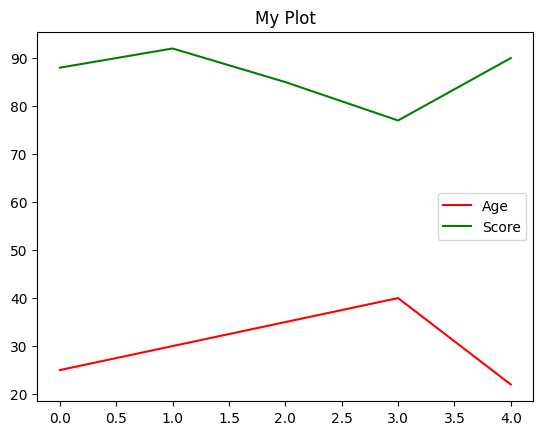

In [311]:
df.plot.line(title="My Plot", color=["red", "green"])

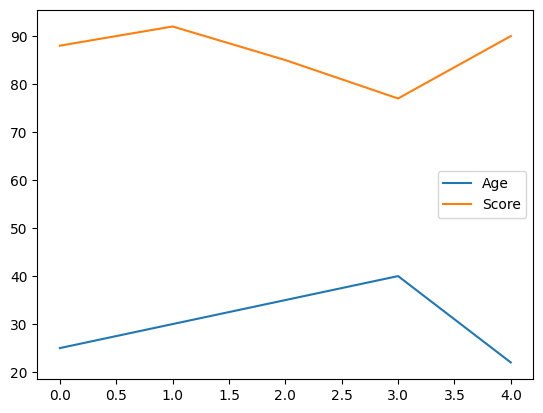

In [315]:
# how to export a plot
p = df.plot.line()
f = p.get_figure()
f.savefig("myplot.jpg")
f.savefig("myplot.pdf")

<Axes: >

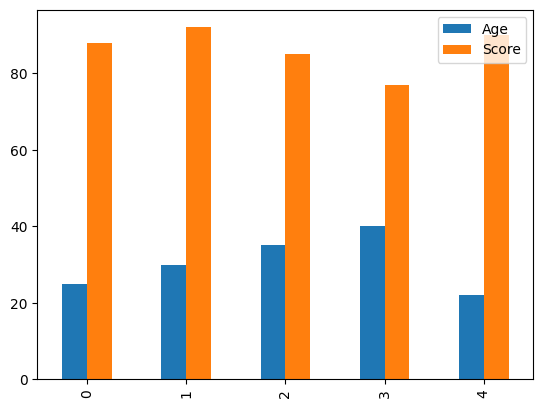

In [316]:
df.plot.bar()

<Axes: >

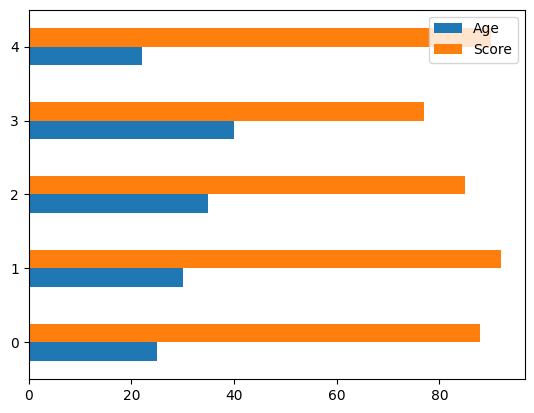

In [318]:
df.plot.barh()

array([<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Score'}>],
      dtype=object)

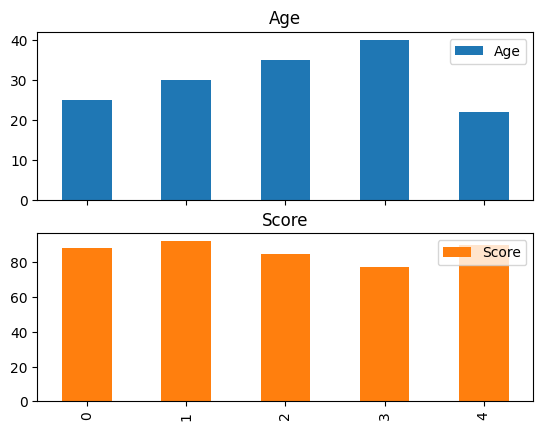

In [319]:
df.plot.bar(subplots=True)

<Axes: >

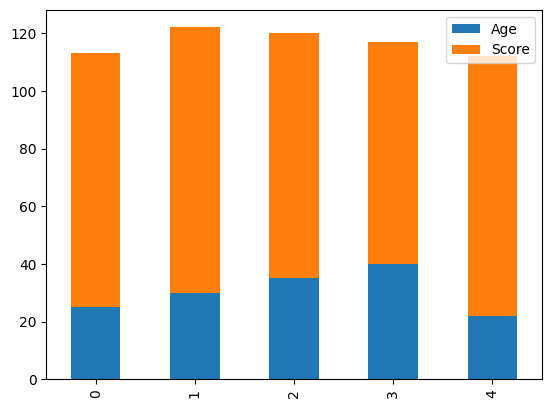

In [320]:
df.plot.bar(stacked=True)

<Axes: ylabel='Frequency'>

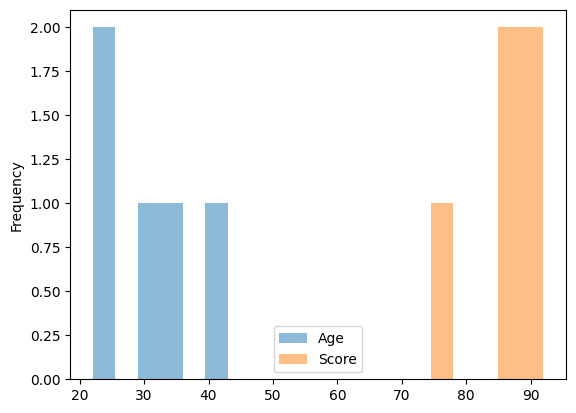

In [321]:
df.plot.hist(bins=20, alpha=0.5)

In [324]:
# df.plot.pie()

<Axes: >

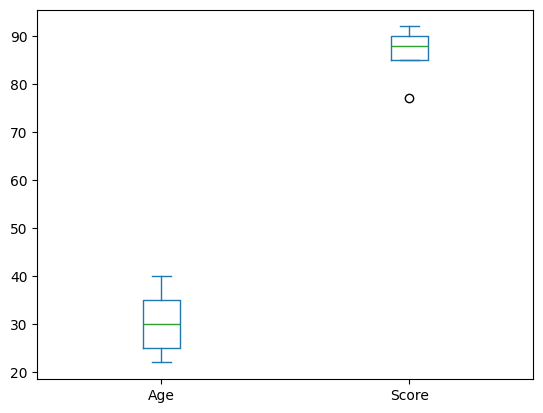

In [325]:
df.plot.box()

<Axes: xlabel='Age', ylabel='Score'>

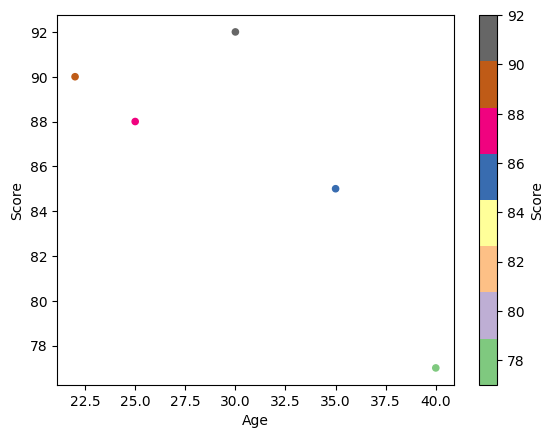

In [337]:
df.plot.scatter(x="Age", y="Score", c="Score", colormap="Accent")

In [329]:
df[["Age", "Score"]].corr()

,Age,Score
Age,1.00000,-0.80571
Score,-0.80571,1.00000


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Score', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Score'>,
        <Axes: xlabel='Score', ylabel='Score'>]], dtype=object)

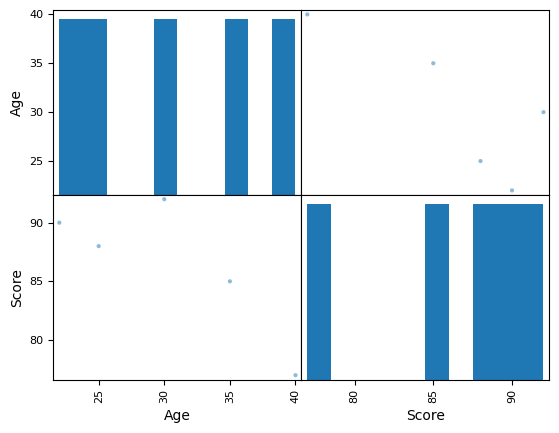

In [338]:
pd.plotting.scatter_matrix(df)